## 1. 项目背景：
泰坦尼克号沉没是历史上最臭名昭著的沉船事件之一。在1912年4月15日的处女航中，泰坦尼克号撞上冰山后沉没，2224名乘客和船员中有1502人遇难。这场轰动的悲剧震惊了国际社会，也促进了对船舶安全条例的修订。这起沉船事件造成如此大伤亡的原因之一是没有足够的救生船。然而尽管在沉船中存活也有一些运气因素，但是某些人群似乎比其他人有更大的幸存可能性，比如女性、儿童、头等舱乘客。
## 2. 提出问题：
乘客幸存概率可能和哪些因素有关？


**假设：**相比其他乘客，妇女、儿童和头等舱的乘客的幸存率可能更高。
## 3. 数据处理

In [977]:
#导入数据处理所需的库
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
#载入数据文件
train_file='F://data analyst//titanic//train.csv'
test_file='F://data analyst//titanic//test.csv'
titanic_df=pd.read_csv(train_file)
test_df=pd.read_csv(test_file)
#预览数据
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [978]:
#获取数据基本信息
titanic_df.info()
print ('-'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

In [979]:
#对所有数值型变量进行描述性统计分析
titanic_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Graham, Mr. George Edward",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [980]:
test_df.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Rosenbaum, Miss. Edith Louise",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


### 结论：
**1. 数据类型：**


  * 无序分类变量：Sex,Embarked,Survived,Ticket,Cabin
  
  
  * 有序分类变量：Pclass,PassengerId
  
  
  * 数值变量：Age,SibSp,Parch,Fare
 
**2. 数据缺失：**Age、Cabin、Embarked这三个变量有不同程度的数据缺失问题，其中Cabin只有204个数据。

### Age变量：
Age变量有177个缺失值。


数据中Name变量有关于title的信息，所以作一个假设：相同title的乘客的年龄可能有一定相似性。


接下来，提取Name变量中的title信息，然后根据title分组计算年龄分布，验证上述假设是否成立。

In [981]:
#提取Name中的title信息和Last name信息
def format_name(df):
    df['Lname']=df.Name.str.extract('([A-Za-z]+)\,',expand=False)
    df['Title']=df.Name.str.extract('([A-Za-z]+)\.',expand=False)
    df['Title'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],['Miss','Miss','Miss','Mrs','Mr','Royal','Royal','Other','Other','Other','Other','Royal','Mr','Mrs'],inplace=True)
    return df
titanic_df=format_name(titanic_df)
test_df=format_name(test_df)

In [982]:
#不同title不同性别的乘客的人数分布
pd.crosstab(titanic_df['Title'],titanic_df['Sex'])

Sex,female,male
Title,,
Master,0,40
Miss,186,0
Mr,0,520
Mrs,126,6
Other,0,10
Royal,2,1


In [983]:
#对不同title的乘客的年龄进行描述性统计分析
titanic_df.groupby('Title')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Title,,,,,,,,
Master,36.0,4.574167,3.619872,0.42,1.000,3.5,8.00,12.0
Miss,150.0,21.860000,12.828485,0.75,14.625,21.5,30.00,63.0
Mr,401.0,32.467581,12.720071,11.00,23.000,30.0,39.00,80.0
Mrs,114.0,36.219298,11.491250,14.00,28.000,35.0,44.75,63.0
Other,10.0,48.300000,14.118939,27.00,39.000,52.5,56.75,70.0
Royal,3.0,43.333333,8.962886,33.00,40.500,48.0,48.50,49.0


### 处理方法：
相同title的乘客的年龄差别不大，所以假设基本成立。


对于每组title的年龄缺失值，尝试用该组的平均年龄填充。

In [984]:
#对年龄的缺失值进行填充
def fill_age(df):
    df.loc[(df.Age.isnull())&(df.Title=='Master'),'Age']=5
    df.loc[(df.Age.isnull())&(df.Title=='Miss'),'Age']=22
    df.loc[(df.Age.isnull())&(df.Title=='Mr'),'Age']=33
    df.loc[(df.Age.isnull())&(df.Title=='Mrs'),'Age']=36
    df.loc[(df.Age.isnull())&(df.Title=='Other'),'Age']=48
    df.loc[(df.Age.isnull())&(df.Title=='Royal'),'Age']=43
    return df
titanic_df=fill_age(titanic_df)
test_df=fill_age(test_df)

### Embarked变量：
Embarked变量有2个缺失值。

In [985]:
#计算每个港口的上船人数
titanic_df.groupby(['Embarked'])['PassengerId'].count()

Embarked
C    168
Q     77
S    644
Name: PassengerId, dtype: int64

### 处理方法：
由于Embarked变量只有两个缺失值，所以就以出现频率最高的‘S’值填充。

In [986]:
#对Embakred缺失值进行填充
def fill_embarked(df):
    df['Embarked']=df['Embarked'].fillna('S')
    return df
titanic_df=fill_embarked(titanic_df)
test_df=fill_embarked(test_df)

### Cabin变量：


In [987]:
titanic_df['Cabin'].describe(include='all')

count             204
unique            147
top       C23 C25 C27
freq                4
Name: Cabin, dtype: object

Cabin变量只有204个值,有57个重复值。

In [988]:
titanic_df[titanic_df['Cabin'].isnull()]['Survived'].mean()

0.29985443959243085

In [989]:
titanic_df[titanic_df['Cabin'].notnull()]['Survived'].mean()

0.6666666666666666

### 处理方法：
由于没有Cabin的乘客的幸存率和有Cabin的乘客的幸存率有比较大的差别，所以尝试把Cabin分为两组：有值的标记为'T'，缺失的标记为'N'。

In [990]:
def fill_cabin(df):
    df.Cabin=df.Cabin.fillna('N')
    df.loc[df['Cabin']!='N','Cabin']='T'
    return df
titanic_df=fill_cabin(titanic_df)
test_df=fill_cabin(test_df)

In [991]:
#用平均值填充测试集中fare的缺失值
test_fare_mean=test_df["Fare"].mean()
test_df['Fare']=test_df["Fare"].fillna(test_fare_mean)

In [992]:
#检验缺失值是否全部填充完毕
titanic_df.info()
print ('-'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       891 non-null object
Lname          891 non-null object
Title          891 non-null object
dtypes: float64(2), int64(5), object(7)
memory usage: 73.1+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-nu

## 4. 数据分析：

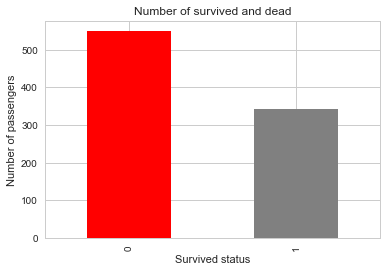

In [993]:
#计算总死亡人数和幸存人数
#0--遇难乘客,1--幸存乘客
%matplotlib inline
titanic_df.Survived.value_counts().plot(kind='bar',color=['red','grey'])
plt.ylabel('Number of passengers')
plt.xlabel('Survived status')
plt.title('Number of survived and dead')

In [994]:
titanic_df['Survived'].mean()

0.3838383838383838

### 发现：
总体幸存率 38.4% 比较低，死亡人数远远大于幸存人数。
### Sex变量：

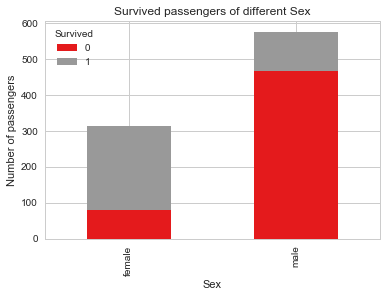

In [995]:
#计算男女乘客的遇难人数和幸存人数
titanic_df.groupby(['Sex','Survived'])['Survived'].count().unstack().plot(kind='bar',stacked=True,cmap='Set1')
plt.ylabel('Number of passengers')
plt.title('Survived passengers of different Sex')

### 发现：
男性乘客中的遇难比例很高，且数量远大于女性乘客。而女性乘客的遇难比例则较低。

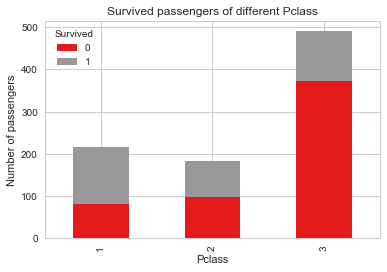

In [996]:
#计算不同Pclass的遇难人数和幸存人数
titanic_df.groupby(['Pclass','Survived'])['Survived'].count().unstack().plot(kind='bar',stacked=True,cmap='Set1')
plt.ylabel('Number of passengers')
plt.title('Survived passengers of different Pclass')

### 发现：
一等舱乘客幸存比例最高，三等舱乘客幸存比例最低。

(0, 1.0)

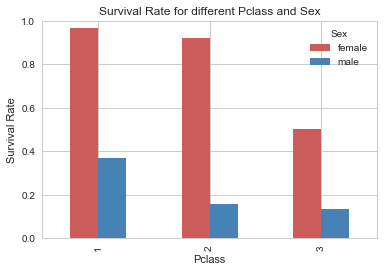

In [997]:
#计算不同Pclass和Sex的幸存率
titanic_df.groupby(['Pclass','Sex'])['Survived'].mean().unstack().plot(kind='bar',color=['indianred','steelblue'])
plt.ylabel('Survival Rate')
plt.title('Survival Rate for different Pclass and Sex')
plt.ylim(0,1.0)

### 发现：
从Sex和Pclass两个变量看幸存率，一等舱和二等舱的女性乘客幸存率很高，超过0.8，而二等舱和三等舱的男性乘客的幸存率则很低，低于0.2 。

### Age变量：

In [998]:
#对年龄分布进行描述性统计分析
titanic_df['Age'].describe()

count    891.000000
mean      29.845309
std       13.282706
min        0.420000
25%       22.000000
50%       30.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

In [999]:
#将年龄划分成7个区间，并分别标记婴幼儿，儿童，少年，学生，青年人，成年人，老年人
def split_age(df):
    bins=(0,5,12,18,25,35,60,81)
    group_names=['Baby','Child','Teenager','Student','Young Adult','Adult','Senior']
    categories=pd.cut(df.Age,bins,labels=group_names,right=False)
    df.Age=categories
    return df
titanic_df=split_age(titanic_df)
test_df=split_age(test_df)

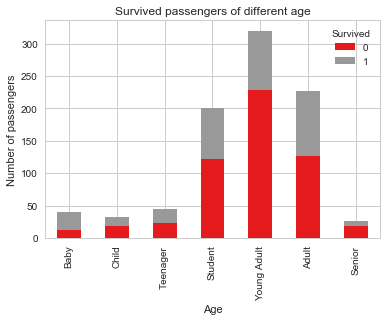

In [1000]:
#计算不同年龄组的幸存人数与遇难人数
fig1=titanic_df.groupby(['Age'])['Survived'].value_counts().unstack().reset_index().set_index('Age').loc[group_names].plot(kind='bar',cmap='Set1',stacked=True)
plt.ylabel('Number of passengers')
plt.title('Survived passengers of different age')

(0, 1.0)

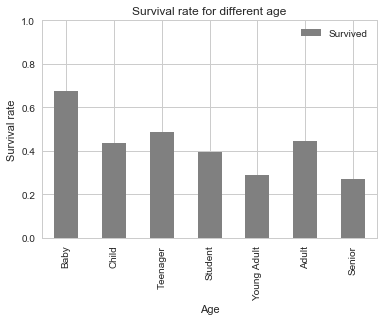

In [1001]:
#计算不同年龄组的幸存率
fig2=titanic_df.groupby(['Age'])['Survived'].mean().reset_index().set_index('Age').loc[group_names].plot(kind='bar',color='grey')
plt.ylabel('Survival rate')
plt.title('Survival rate for different age')
plt.ylim(0,1.0)

(0, 1.0)

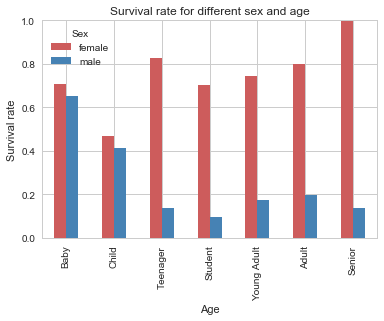

In [1002]:
#加上性别的维度，分别计算每个年龄组内不同性别的幸存率
fig3=titanic_df.groupby(['Age','Sex'])['Survived'].mean().unstack().reset_index().set_index('Age').loc[group_names].plot(kind='bar',color=['indianred','steelblue'])
plt.ylabel('Survival rate')
plt.title('Survival rate for different sex and age')
plt.ylim(0,1.0)

### 发现：
**1.** 从幸存人数上看：由于总体人数的年龄呈左偏分布，所以幸存人数的年龄也相应呈左偏分布。学生（18-25），青年人（25-35），成年人（35-60）这三组的幸存人数最多。


**2.** 从幸存人数比例上看：婴幼儿（0-5）的幸存比例明显高于其他年龄组，而老年人（60-80）的幸存比例最低。


**3.** 从性别和年龄这两个维度上看：
  * 在12岁以下年龄区间（婴幼儿和儿童）内，男性和女性的幸存率相差不大。
  * 在12岁以上的年龄区间内，女性的幸存率均远高于男性的幸存率。
  * 单看幸存比例，女性老年人的幸存率最高，达到1，男性少年的幸存率最低，只有0.1左右，差值非常大。
  * 不同年龄组的女性幸存率情况和不同年龄组的男性幸存率情况截然不同。女性中，儿童组（5-12）幸存率偏低，其他各组幸存率都偏高。男性中，婴幼儿（0-5）组和儿童（5-12）组稍高，其他组幸存率相近，都低于0.2


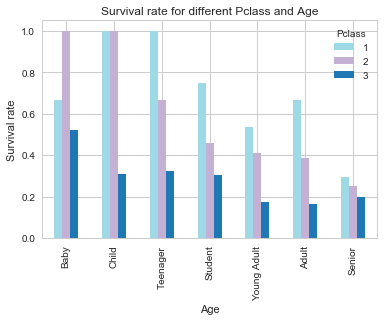

In [1003]:
#加上Pclass维度，分别计算每个年龄组内不同Pclass的幸存率
titanic_df.groupby(['Age','Pclass'])['Survived'].mean().unstack().reset_index().set_index('Age').loc[group_names].plot(kind='bar',cmap='tab20_r')
plt.ylabel('Survival rate')
plt.title('Survival rate for different Pclass and Age')

### 发现：
**1.** 在婴幼儿组（0-5）和老年人（60-80），不同舱位类别的乘客幸存率大致相近。

**2.** 在5岁-60岁的5个年龄组内，一等舱和二等舱乘客的幸存率均高于三等舱乘客的幸存率。


**3.** 特别的是，儿童组（5-12）的一等舱和二等舱幸存率相等，均达到1，但是由于儿童组的三等舱幸存率却很低，只有0.2。这可能是女性整体幸存率都很高，只有儿童组偏低的原因，同时也表现出了舱位等级（Pclass）因素对幸存率可能有比较大的影响。

### Embarked 变量：


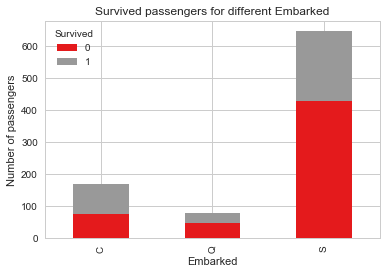

In [1004]:
#计算不同港口登船的乘客幸存人数与遇难人数
titanic_df.groupby(['Embarked'])['Survived'].value_counts().unstack().plot(kind='bar',cmap='Set1',stacked=True)
plt.ylabel('Number of passengers')
plt.title('Survived passengers for different Embarked')

### 发现：
从总体人数上看，S>>C>Q,幸存人数也是类似的大小关系，S>>C>Q

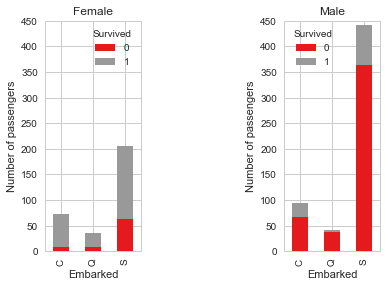

In [1005]:
#加上性别维度，每个港口登船的不同性别的乘客的幸存人数与遇难人数
f,ax=plt.subplots(1,2)
titanic_df[titanic_df['Sex']=='female'].groupby(['Embarked'])['Survived'].value_counts().unstack().plot(kind='bar',cmap='Set1',stacked=True,ax=ax[0],figsize=(6,4))
ax[0].set(title='Female',ylabel='Number of passengers',ylim=(0,450))
titanic_df[titanic_df['Sex']=='male'].groupby(['Embarked'])['Survived'].value_counts().unstack().plot(kind='bar',cmap='Set1',stacked=True,ax=ax[1],figsize=(6,4))
ax[1].set(title='Male',ylabel='Number of passengers',ylim=(0,450))
f.subplots_adjust(wspace=1.5,hspace=0.3,left=0.125,right=0.9,top=0.9,bottom=0.1)

### 发现：
**1.** 两张图对比比较明显，对每个登船港口而言，女性幸存率均远高于男性幸存率。

**2.** 特别的是，对于C、Q两个港口来说，女性乘客几乎全部幸存，而男性乘客则几乎全部遇难。

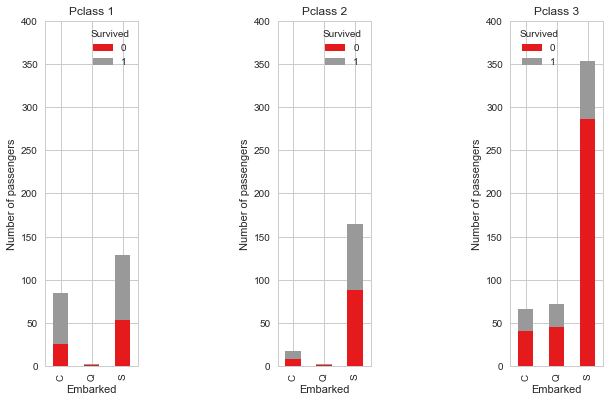

In [1006]:
#加上Pclass维度，计算每个登船港口中不同Pclass的幸存人数与遇难人数
f,ax=plt.subplots(1,3)
titanic_df[titanic_df['Pclass']==1].groupby(['Embarked'])['Survived'].value_counts().unstack().plot(kind='bar',cmap='Set1',stacked=True,ax=ax[0],figsize=(10,6))
ax[0].set(title='Pclass 1',ylabel='Number of passengers',ylim=(0,400))
titanic_df[titanic_df['Pclass']==2].groupby(['Embarked'])['Survived'].value_counts().unstack().plot(kind='bar',cmap='Set1',stacked=True,ax=ax[1],figsize=(10,6))
ax[1].set(title='Pclass 2',ylabel='Number of passengers',ylim=(0,400))
titanic_df[titanic_df['Pclass']==3].groupby(['Embarked'])['Survived'].value_counts().unstack().plot(kind='bar',cmap='Set1',stacked=True,ax=ax[2],figsize=(10,6))
ax[2].set(title='Pclass 3',ylabel='Number of passengers',ylim=(0,400))
f.subplots_adjust(wspace=1.5,hspace=0.3,left=0.125,right=0.9,top=0.9,bottom=0.1)

### 发现：
**1.** 相同舱位类别（Pclass）中，不同港口登船的乘客的幸存率相差不大。

**2.** 每个港口登船的乘客的舱位等级分布都不尽相同， C：以一等舱和三等舱为主，Q&S：以三等舱为主。

### Cabin变量：

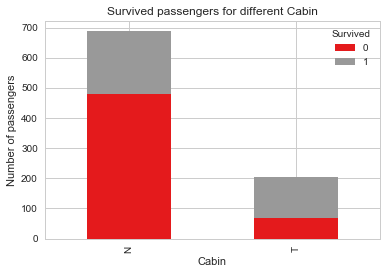

In [1007]:
#计算不同Cabin状态的乘客幸存人数与遇难人数
titanic_df.groupby(['Cabin'])['Survived'].value_counts().unstack().plot(kind='bar',cmap='Set1',stacked=True)
plt.ylabel('Number of passengers')
plt.title('Survived passengers for different Cabin')

### 发现：
**1.** 无Cabin的乘客总人数远大于有Cabin的乘客总体人数。

**2.** 有Cabin的乘客幸存率远大于无abin的乘客。

(0, 1.0)

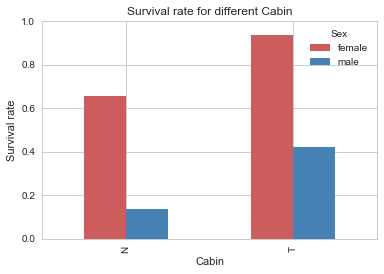

In [1008]:
#加入性别维度，计算不同Cabin状态的乘客中不同性别的幸存率
titanic_df.groupby(['Cabin','Sex'])['Survived'].mean().unstack().plot(kind='bar',color=['indianred','steelblue'])
plt.ylabel('Survival rate')
plt.title('Survival rate for different Cabin')
plt.ylim(0,1.0)

### 发现：
有Cabin的女性乘客的幸存率较高，接近1，无Cabin 的男性乘客的幸存率偏低，低于0.2

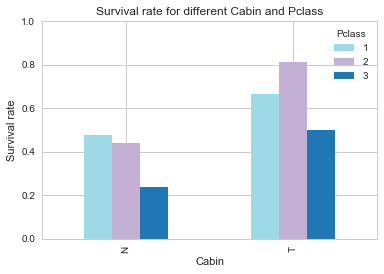

In [1009]:
#加入Pclass维度，计算不同Cabin状态的乘客中不同Pclass的幸存率
titanic_df.groupby(['Cabin','Pclass'])['Survived'].mean().unstack().plot(kind='bar',cmap='tab20_r')
plt.ylim(0,1.0)
plt.ylabel('Survival rate')
plt.title('Survival rate for different Cabin and Pclass')

### 发现：
**1.** 相同的Pclass，有Cabin的乘客幸存率总是高于无Cabin的乘客。

**2.** 一等舱中不同Cabin状态的幸存率差别较小，其他舱不同Cabin状态的幸存率差别较大。

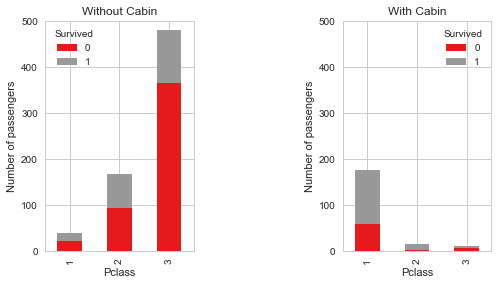

In [1010]:
#计算不同Cabin状态的乘客中不同Pclass的幸存人数与遇难人数
f,ax=plt.subplots(1,2)
titanic_df[titanic_df['Cabin']=='N'].groupby(['Pclass'])['Survived'].value_counts().unstack().plot(kind='bar',cmap='Set1',stacked=True,ax=ax[0],figsize=(8,4))
ax[0].set(title='Without Cabin',ylabel='Number of passengers',ylim=(0,500))
titanic_df[titanic_df['Cabin']=='T'].groupby(['Pclass'])['Survived'].value_counts().unstack().plot(kind='bar',cmap='Set1',stacked=True,ax=ax[1],figsize=(8,4))
ax[1].set(title='With Cabin',ylabel='Number of passengers',ylim=(0,500))
f.subplots_adjust(wspace=1,hspace=0.3,left=0.125,right=0.9,top=0.9,bottom=0.1)

### 发现：
**1.** 无Cabin的乘客以三等舱和二等舱为主。

**2.** 有Cabin的乘客以一等舱为主，这可能是有Cabin的乘客幸存率高于无Cabin 的乘客的一个原因。

### Fare变量：


In [1011]:
#对Fare变量进行描述性统计分析
titanic_df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

[(0, 515)]

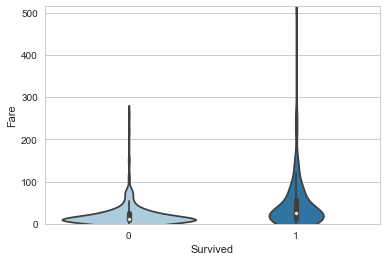

In [1012]:
#计算Fare频数分布
f=sns.violinplot(y='Fare',x='Survived',data=titanic_df,palette='Paired')
f.set(ylim=(0,515))

### 发现：
**1.** 遇难乘客的消费总体呈右偏分布，大部分消费在30以下,高消费较少。

**2.** 幸存乘客的消费整体也呈右偏分布，大部分消费在100以下，但分布更广，高消费更多。

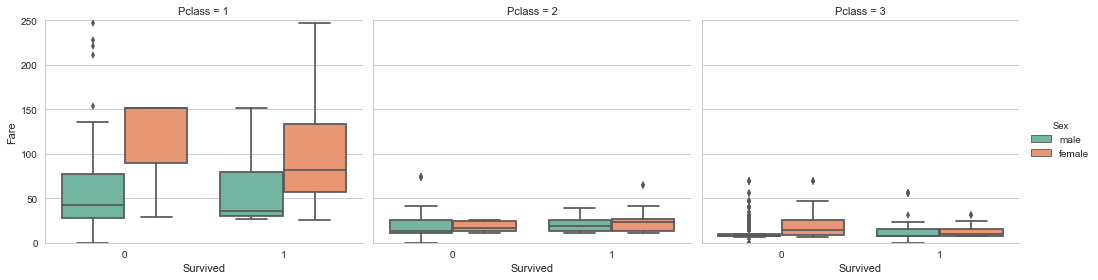

In [1013]:
#加上Pclass和性别维度，看不同舱位类别和不同性别中遇难与幸存乘客的消费对比情况
sns.set_style("whitegrid")
g=sns.factorplot(x='Survived',y='Fare',data=titanic_df,hue='Sex',col='Pclass',kind='box',size=4,aspect=1.2,palette='Set2')
g.set(ylim=(0,250))

### 发现：
**1.** 一等舱中，男女消费差异较大，女性乘客消费明显较多，而男性乘客消费较少;同性别的幸存乘客与遇难乘客的消费相近。

**2.** 二等舱和三等舱中，男女消费差异较小，均在100以下，同性别的幸存乘客与遇难乘客的消费也相近。

**3.** 不同舱位类别之间的消费差异较大，一等舱的消费远高于二等舱和三等舱。

In [1014]:
#将消费费用划分成8个区间，并分别标记
def split_fare(df):
    bins=(0,8,15,31,50,100,150,200,513)
    group_names_1=['0-8','8-15','15-31','31-50','50-100','100-150','150-200','200-513']
    categories_1=pd.cut(df.Fare,bins,labels=group_names_1,right=False)
    df.Fare=categories_1
    return df
titanic_df=split_fare(titanic_df)
test_df=split_fare(test_df)

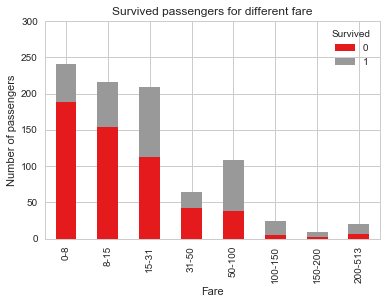

In [1015]:
#计算不同消费区间的遇难人数与幸存人数
titanic_df.groupby(['Fare'])['Survived'].value_counts().unstack().reset_index().set_index('Fare').loc[group_names_1].plot(kind='bar',stacked=True,cmap='Set1')
plt.ylim(0,300)
plt.ylabel('Number of passengers')
plt.title('Survived passengers for different fare')

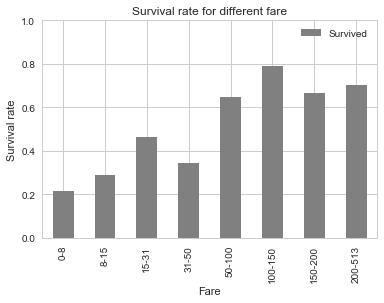

In [1016]:
#计算不同消费区间的幸存率
titanic_df.groupby(['Fare'])['Survived'].mean().reset_index().set_index('Fare').loc[group_names_1].plot(kind='bar',color='grey')
plt.ylim(0,1)
plt.ylabel('Survival rate')
plt.title('Survival rate for different fare')

### 发现：
**1.** 从人数上看，消费31以下的乘客总人数最多，占很大的比例；幸存乘客的消费区间的人数分布与总体乘客的消费区间的人数分布相似。

**2.** 不同消费区间的幸存率差异较大，50以上的高消费乘客的幸存率明显低于50以下的低消费乘客。

### Parch变量 & SibSp 变量：

In [1017]:
#对随行的父子和孩子人数进行描述性统计分析
titanic_df.Parch.describe()

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

In [1018]:
#对随行的兄弟姐妹人数进行描述性统计分析
titanic_df.SibSp.describe()

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

In [1019]:
#将Parch和SibSp两个变量相加，合并成随行家人的人数
titanic_df['Alone_or_With_family']=titanic_df.Parch+titanic_df.SibSp
test_df['Alone_or_With_family']=test_df.Parch+test_df.SibSp
titanic_df['Alone_or_With_family'].describe()

count    891.000000
mean       0.904602
std        1.613459
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       10.000000
Name: Alone_or_With_family, dtype: float64

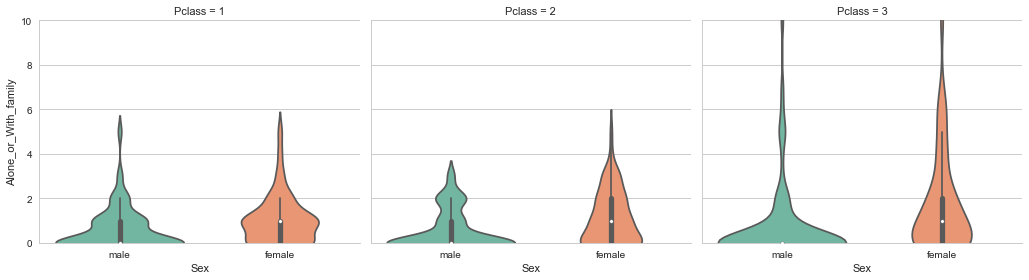

In [1020]:
#计算不同Pclass的随行家人人数分布
h=sns.factorplot(y='Alone_or_With_family',data=titanic_df,x='Sex',col='Pclass',kind='violin',size=4,aspect=1.2,palette='Set2')
h.set(ylim=(0,10))

### 发现：
** 1.** 一等舱和二等舱：乘客主要是独自一人或三人以下小家庭出游。

** 2.** 三等舱：乘客的出游家庭结构比较多样，以独自一人或三人以下小家庭出游为主，少量三人以上大家庭，七人以上的超大家庭也位于三等舱。

** 3.** 从性别上看：男性乘客以独自一人为主，女性乘客相比而言，更偏好家庭出游。

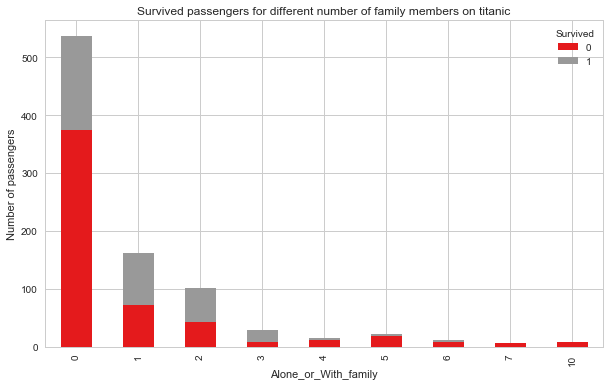

In [1021]:
#计算不同的随行家人人数的幸存人数与遇难人数
titanic_df.groupby(['Alone_or_With_family'])['Survived'].value_counts().unstack().plot(kind='bar',stacked=True,cmap='Set1',figsize=(10,6))
plt.ylabel('Number of passengers')
plt.title('Survived passengers for different number of family members on titanic')

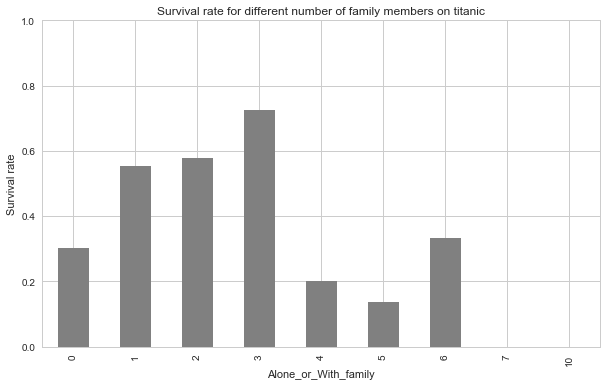

In [1022]:
#计算不同的随行家人人数的幸存率
titanic_df.groupby(['Alone_or_With_family'])['Survived'].mean().plot(kind='bar',figsize=(10,6),color='grey',ylim=(0,1.0))
plt.ylabel('Survival rate')
plt.title('Survival rate for different number of family members on titanic')

### 发现：
**1.** 大部分乘客都是独自乘船，和家人一同前来的乘客中以两人家庭和三人家庭为主。

**2.** 从人数上看，
   * 和较多家人一起的乘客的幸存率非常低，特别是八人家庭和十一人家庭，均全体遇难。
   * 由于全体乘客的家庭结构大致呈右偏分布，所以幸存人数也呈右偏分布，以独自乘船的乘客和二人组和三人组家庭的乘客为主。

**3.** 从幸存率上看，大致呈中间高两头低的分布形态，二人组和三人组家庭的乘客幸存率显然较高，独自乘船的乘客和多人组家庭的乘客的幸存率则较低。

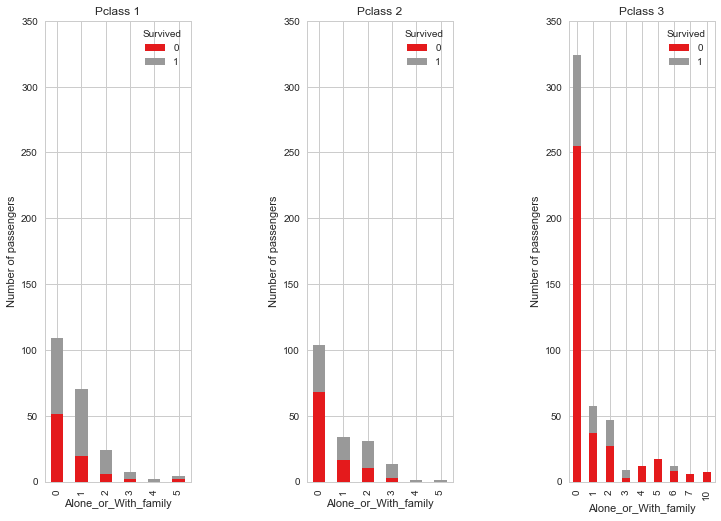

In [1023]:
#计算不同Pclass和随行家人的人数下的幸存人数与遇难人数
f,ax=plt.subplots(1,3)
titanic_df[titanic_df['Pclass']==1].groupby(['Alone_or_With_family'])['Survived'].value_counts().unstack().plot(kind='bar',cmap='Set1',stacked=True,ax=ax[0],figsize=(12,8))
ax[0].set(title='Pclass 1',ylabel='Number of passengers',ylim=(0,350))
titanic_df[titanic_df['Pclass']==2].groupby(['Alone_or_With_family'])['Survived'].value_counts().unstack().plot(kind='bar',cmap='Set1',stacked=True,ax=ax[1],figsize=(12,8))
ax[1].set(title='Pclass 2',ylabel='Number of passengers',ylim=(0,350))
titanic_df[titanic_df['Pclass']==3].groupby(['Alone_or_With_family'])['Survived'].value_counts().unstack().plot(kind='bar',cmap='Set1',stacked=True,ax=ax[2],figsize=(12,8))
ax[2].set(title='Pclass 3',ylabel='Number of passengers',ylim=(0,350))
f.subplots_adjust(wspace=0.8,hspace=0.3,left=0.125,right=0.9,top=0.9,bottom=0.1)

### 发现：
**1.** 各个不同舱位等级中，乘客的出游家庭遇难人数和幸存人数分布大致相似，三人以下小家庭的幸存率较高，多人家庭和独自一人的幸存率较低。

**2.** 一个特别的发现是，在一等舱和二等舱中，与四个家人一同出游的乘客全都幸存，但反观三等舱，同样与四个家人一同出游的乘客却全部遇难，由此可见，舱位等级对乘客幸存率的影响非常大。

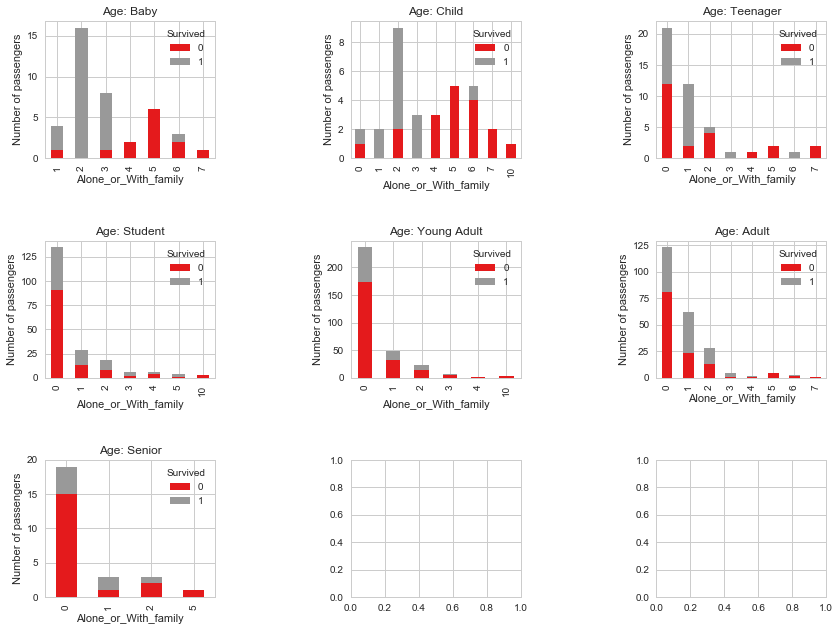

In [1024]:
l,ax=plt.subplots(3,3)
def set_plot(i,a,b):
    titanic_df[titanic_df['Age']==i].groupby(['Alone_or_With_family'])['Survived'].value_counts().unstack().plot(kind='bar',cmap='Set1',stacked=True,ax=ax[a,b],figsize=(14,10))
    ax[a,b].set(ylabel='Number of passengers',title='Age: %s'%(i))
set_plot('Baby',0,0)
set_plot('Child',0,1)
set_plot('Teenager',0,2)
set_plot('Student',1,0)
set_plot('Young Adult',1,1)
set_plot('Adult',1,2)
set_plot('Senior',2,0)
l.subplots_adjust(wspace=0.8,hspace=0.6,left=0.125,right=0.9,top=0.9,bottom=0.1)

### 发现：
**1.** 各个年龄组均反映出一个现象，随行一到二个家人的幸存率最高，独自出行的幸存率居中，随行家人过多的幸存率最低。

**2.** 一个奇怪的发现是，有个别12岁以下儿童是独自出行。

### 总结：
**1.** 经过以上初步分析，对幸存率有明显影响的因素是：
  * 性别（Sex）:女性比男性有更高的幸存率
  * 舱位类别（Plcass）:一等舱和二等舱比三等舱有更高的幸存率
  * 年龄（Age）:5岁以下婴幼儿的幸存率比其他年龄更高
  * Cabin:有Cabin的幸存率比无Cabin的幸存率更高
  * 随行家人人数（Parch & SibSip）:随行一到二个家人的幸存率最高，独自出行的幸存率居中，随行家人过多的幸存率最低。
  
**2.** 变量间的关联性：
  * Cabin与Pclass : 有Cabin的大多为一等舱乘客
  * Fare与Pcalss:Fare较高的大多为一等舱乘客，Fare较低的大多为二等舱和三等舱乘客
  

### 5. 特征工程
### Age 变量 ：

In [1025]:
age_mapping={'Baby':0,'Child':1,'Teenager':2,'Student':3,'Young Adult':4,'Adult':5,'Senior':6}
titanic_df['Age']=titanic_df['Age'].map(age_mapping)
test_df['Age']=test_df['Age'].map(age_mapping)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Lname,Title,Alone_or_With_family
0,1,0,3,"Braund, Mr. Owen Harris",male,3,1,0,A/5 21171,0-8,N,S,Braund,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5,1,0,PC 17599,50-100,T,C,Cumings,Mrs,1
2,3,1,3,"Heikkinen, Miss. Laina",female,4,0,0,STON/O2. 3101282,0-8,N,S,Heikkinen,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5,1,0,113803,50-100,T,S,Futrelle,Mrs,1
4,5,0,3,"Allen, Mr. William Henry",male,5,0,0,373450,8-15,N,S,Allen,Mr,0


In [1026]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Lname,Title,Alone_or_With_family
0,892,3,"Kelly, Mr. James",male,4,0,0,330911,0-8,N,Q,Kelly,Mr,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,5,1,0,363272,0-8,N,S,Wilkes,Mrs,1
2,894,2,"Myles, Mr. Thomas Francis",male,6,0,0,240276,8-15,N,Q,Myles,Mr,0
3,895,3,"Wirz, Mr. Albert",male,4,0,0,315154,8-15,N,S,Wirz,Mr,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,3,1,1,3101298,8-15,N,S,Hirvonen,Mrs,2


### Sex 变量：

In [1027]:
sex_mapping={'male':0,'female':1}
titanic_df['Sex']=titanic_df['Sex'].map(sex_mapping)
test_df['Sex']=test_df['Sex'].map(sex_mapping)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Lname,Title,Alone_or_With_family
0,1,0,3,"Braund, Mr. Owen Harris",0,3,1,0,A/5 21171,0-8,N,S,Braund,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,5,1,0,PC 17599,50-100,T,C,Cumings,Mrs,1
2,3,1,3,"Heikkinen, Miss. Laina",1,4,0,0,STON/O2. 3101282,0-8,N,S,Heikkinen,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,5,1,0,113803,50-100,T,S,Futrelle,Mrs,1
4,5,0,3,"Allen, Mr. William Henry",0,5,0,0,373450,8-15,N,S,Allen,Mr,0


### Embarked 变量：

In [1028]:
embarked_mapping={'S':0,'C':1,'Q':2}
titanic_df['Embarked']=titanic_df['Embarked'].map(embarked_mapping)
test_df['Embarked']=test_df['Embarked'].map(embarked_mapping)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Lname,Title,Alone_or_With_family
0,1,0,3,"Braund, Mr. Owen Harris",0,3,1,0,A/5 21171,0-8,N,0,Braund,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,5,1,0,PC 17599,50-100,T,1,Cumings,Mrs,1
2,3,1,3,"Heikkinen, Miss. Laina",1,4,0,0,STON/O2. 3101282,0-8,N,0,Heikkinen,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,5,1,0,113803,50-100,T,0,Futrelle,Mrs,1
4,5,0,3,"Allen, Mr. William Henry",0,5,0,0,373450,8-15,N,0,Allen,Mr,0


### Fare 变量：

In [1029]:
titanic_df["Fare"].describe()

count     891
unique      8
top       0-8
freq      241
Name: Fare, dtype: object

In [1030]:
fare_mapping={'0-8':0,'8-15':1,'15-31':2,'31-50':3,'50-100':4,'100-150':5,'150-200':6,'200-513':7}
titanic_df['Fare']=titanic_df['Fare'].map(fare_mapping)
test_df['Fare']=test_df['Fare'].map(fare_mapping)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Lname,Title,Alone_or_With_family
0,1,0,3,"Braund, Mr. Owen Harris",0,3,1,0,A/5 21171,0,N,0,Braund,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,5,1,0,PC 17599,4,T,1,Cumings,Mrs,1
2,3,1,3,"Heikkinen, Miss. Laina",1,4,0,0,STON/O2. 3101282,0,N,0,Heikkinen,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,5,1,0,113803,4,T,0,Futrelle,Mrs,1
4,5,0,3,"Allen, Mr. William Henry",0,5,0,0,373450,1,N,0,Allen,Mr,0


In [1031]:
test_df["Fare"].describe()

count    418.000000
mean       1.825359
std        1.820646
min        0.000000
25%        0.000000
50%        1.000000
75%        3.000000
max        7.000000
Name: Fare, dtype: float64

### Cabin 变量：

In [1032]:
cabin_mapping={'N':0,'T':1}
titanic_df['Cabin']=titanic_df['Cabin'].map(cabin_mapping)
test_df['Cabin']=test_df['Cabin'].map(cabin_mapping)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Lname,Title,Alone_or_With_family
0,1,0,3,"Braund, Mr. Owen Harris",0,3,1,0,A/5 21171,0,0,0,Braund,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,5,1,0,PC 17599,4,1,1,Cumings,Mrs,1
2,3,1,3,"Heikkinen, Miss. Laina",1,4,0,0,STON/O2. 3101282,0,0,0,Heikkinen,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,5,1,0,113803,4,1,0,Futrelle,Mrs,1
4,5,0,3,"Allen, Mr. William Henry",0,5,0,0,373450,1,0,0,Allen,Mr,0


### Title 变量：

In [1033]:
title_mapping={'Mr':0,'Miss':1,'Mrs':2,'Master':3,'Other':4,'Royal':5}
titanic_df['Title']=titanic_df['Title'].map(title_mapping)
test_df['Title']=test_df['Title'].map(title_mapping)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Lname,Title,Alone_or_With_family
0,1,0,3,"Braund, Mr. Owen Harris",0,3,1,0,A/5 21171,0,0,0,Braund,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,5,1,0,PC 17599,4,1,1,Cumings,2,1
2,3,1,3,"Heikkinen, Miss. Laina",1,4,0,0,STON/O2. 3101282,0,0,0,Heikkinen,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,5,1,0,113803,4,1,0,Futrelle,2,1
4,5,0,3,"Allen, Mr. William Henry",0,5,0,0,373450,1,0,0,Allen,0,0


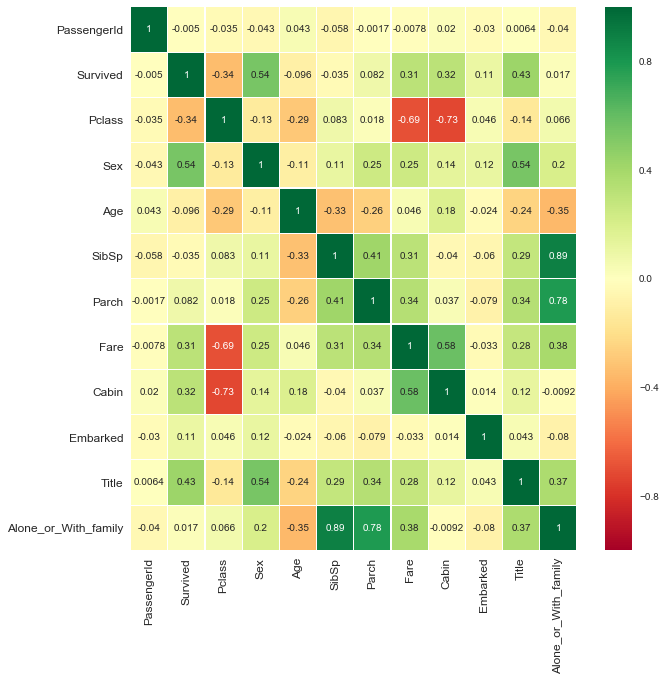

In [1034]:
#绘制变量相关系数矩阵
sns.heatmap(titanic_df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [1035]:
titanic_df=titanic_df.drop(["Name","Ticket","Lname"],axis=1)
test_df=test_df.drop(["Name","Ticket","Lname"],axis=1)
titanic_df.info()
print ('-'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId             891 non-null int64
Survived                891 non-null int64
Pclass                  891 non-null int64
Sex                     891 non-null int64
Age                     891 non-null int64
SibSp                   891 non-null int64
Parch                   891 non-null int64
Fare                    891 non-null int64
Cabin                   891 non-null int64
Embarked                891 non-null int64
Title                   891 non-null int64
Alone_or_With_family    891 non-null int64
dtypes: int64(12)
memory usage: 83.6 KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId             418 non-null int64
Pclass                  418 non-null int64
Sex                     418 non-null int64
Age                     418 non-null int64
SibSp                

### 6. 数据建模：
### 分割数据训练集

In [1036]:
from sklearn.model_selection import train_test_split
X_all=titanic_df.drop(['Survived','PassengerId'],axis=1)
y_all=titanic_df['Survived']
num_test=0.20
X_train,X_test,y_train,y_test=train_test_split(X_all,y_all,test_size=num_test,random_state=0)

### 拟合和调整算法

In [1037]:
#Randomforest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer,accuracy_score
clf=RandomForestClassifier()
clf.fit(X_train,y_train)
predictions=clf.predict(X_test)
print(accuracy_score(predictions,y_test))

0.821229050279


In [1038]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
lr_pred=lr.predict(X_test)
print (accuracy_score(lr_pred,y_test))

0.804469273743


In [1039]:
#Linear SVC
from sklearn.svm import LinearSVC
lsvc=LinearSVC()
lsvc.fit(X_train,y_train)
lsvc_pred=lsvc.predict(X_test)
print (accuracy_score(lsvc_pred,y_test))

0.793296089385


In [1040]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt_pred=dt.predict(X_test)
print (accuracy_score(dt_pred,y_test))

0.810055865922


### 预测数据：

In [1041]:
ids=test_df['PassengerId']
predictions=lr.predict(test_df.drop('PassengerId',axis=1))
output=pd.DataFrame({'PassengerId':ids,'Survived':predictions})
output.to_csv('submission.csv',index=False)
output.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
